In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Amazon Review/

/gdrive/MyDrive/Amazon Review


In [4]:
ls

'Women Dresses Reviews Dataset .csv'


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('ggplot')
import warnings as w
w.filterwarnings(action='ignore')

### generally analysis in review data and I analyzed whether the recommenedation system of large companies like Amazon is performing well.

In [6]:
df = pd.read_csv('/gdrive/MyDrive/Amazon Review/Women Dresses Reviews Dataset .csv')
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [7]:
df.rename(columns={'recommend_index':'recommened'},inplace=True)

In [8]:
df.division_name.value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: division_name, dtype: int64

### total dataset is 23486 rows and 11 columns

### Feature Explain
 - s_no: index
 - division_name: Division of the Cloth customer has bought
 - department name: Large category(top,bottom)
 - class name: small category(jeans, blouses)
 - title: 리뷰 제목 review_title
 - review_text: review contents
 - alike_feedback_count : same or similar feedback count
 - rating: 평점, same feature
 - recommend_index: the presence or absence of recommendations

# EDA

In [9]:
df.isna().sum()

s.no                       0
age                        0
division_name             14
department_name           14
class_name                14
clothing_id                0
title                   3810
review_text              845
alike_feedback_count       0
rating                     0
recommend_index            0
dtype: int64

In [10]:
df.title.fillna('None',inplace=True)
df.review_text.fillna('None',inplace=True)
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23472 non-null  int64 
 1   age                   23472 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23472 non-null  int64 
 6   title                 23472 non-null  object
 7   review_text           23472 non-null  object
 8   alike_feedback_count  23472 non-null  int64 
 9   rating                23472 non-null  int64 
 10  recommend_index       23472 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [12]:
df.isna().sum()

s.no                    0
age                     0
division_name           0
department_name         0
class_name              0
clothing_id             0
title                   0
review_text             0
alike_feedback_count    0
rating                  0
recommend_index         0
dtype: int64

In [13]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


## rating

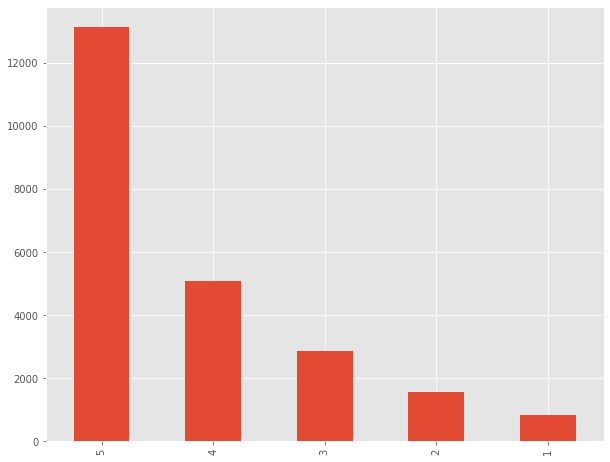

In [14]:
df.rating.value_counts().plot(kind='bar',figsize=(10,8))

**bold text**# Age

In [15]:
print('max_age:',df.age.max())
print('min_age:',df.age.min())

max_age: 99
min_age: 18


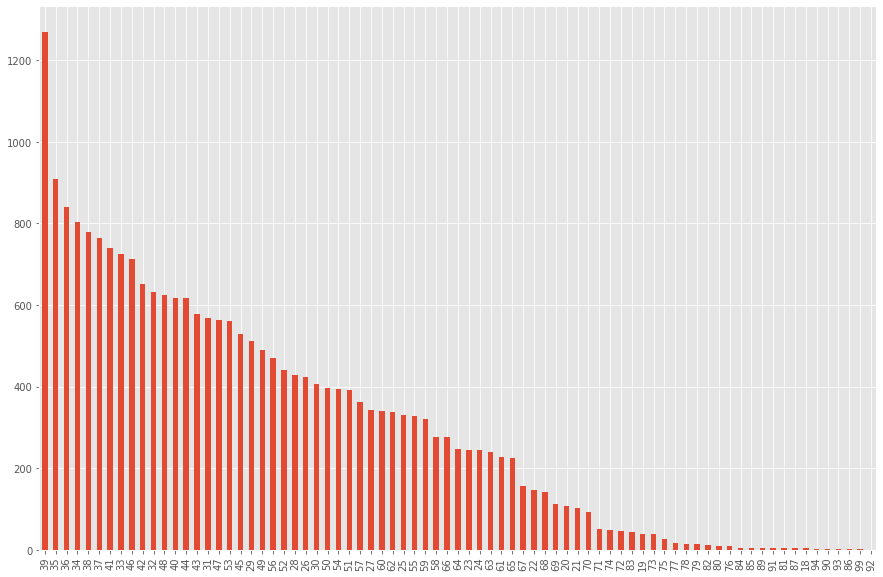

In [16]:
df.age.value_counts().plot(kind='bar',figsize=(15,10))

### Costomers age is between 18 ~ 99
### I think grouping age is more effective, So I process age categorizing

In [17]:
df['age_group'] = pd.qcut(df.age,q=6,labels=['18~29','30~39','40~49','50~59','60~69','70+'])

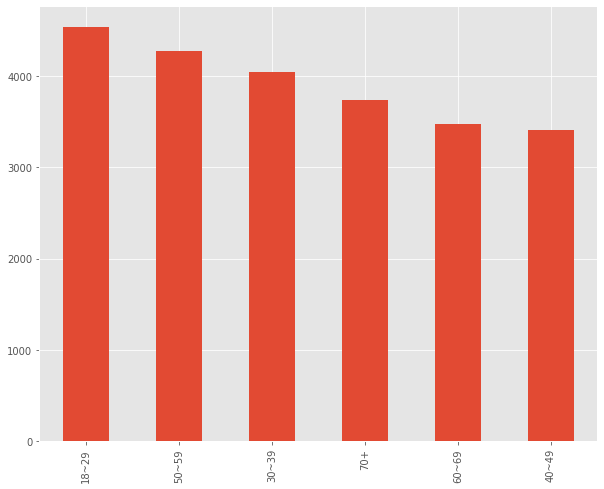

In [18]:
df.age_group.value_counts().plot(kind='bar',figsize=(10,8))

### rating over 3 = positive
### raing under 3 or equals = negative 

In [19]:
rating_group = []
for rating in df.rating:
    if rating >= 4:
        rating_group.append('positive')
    else:
        rating_group.append('negative')

In [20]:
df['rating_group'] = rating_group

positive    18194
negative     5278
Name: rating_group, dtype: int64


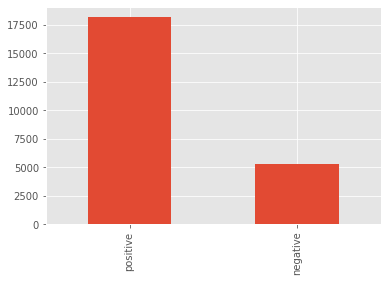

In [21]:
df.rating_group.value_counts().plot(kind='bar')
print(df.rating_group.value_counts())

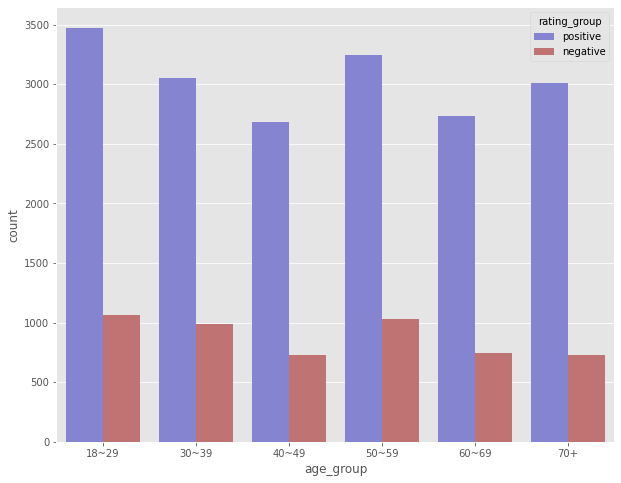

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='age_group',hue='rating_group',palette=['#7777DD','#CC6666'],data=df)

In [23]:
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,age_group,rating_group
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1,40~49,positive
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1,70+,positive
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0,50~59,negative
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1,50~59,positive
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1,30~39,positive


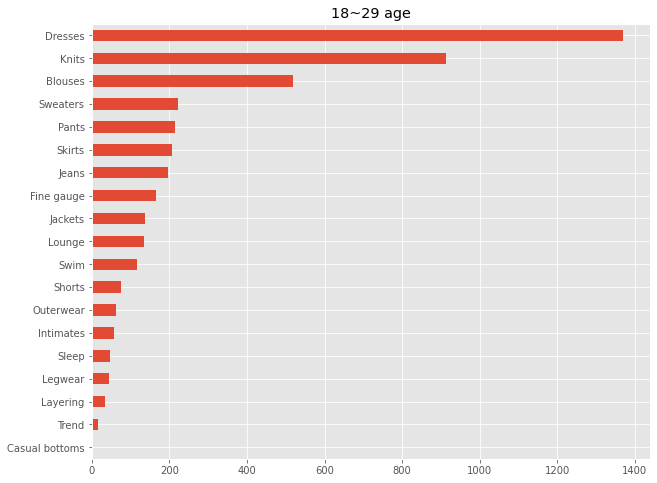

In [24]:
df[df.age_group == '18~29'].class_name.value_counts(ascending=True).plot.barh(figsize=(10,8),title='18~29 age')
plt.show()

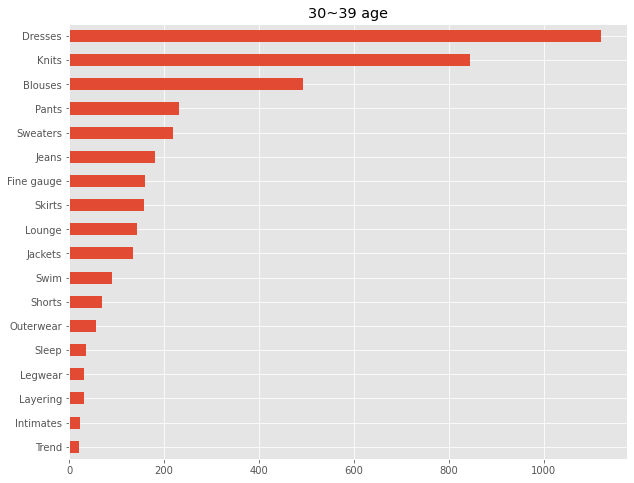

In [25]:
df[df.age_group == '30~39'].class_name.value_counts(ascending=True).plot.barh(figsize=(10,8),title='30~39 age')
plt.show()

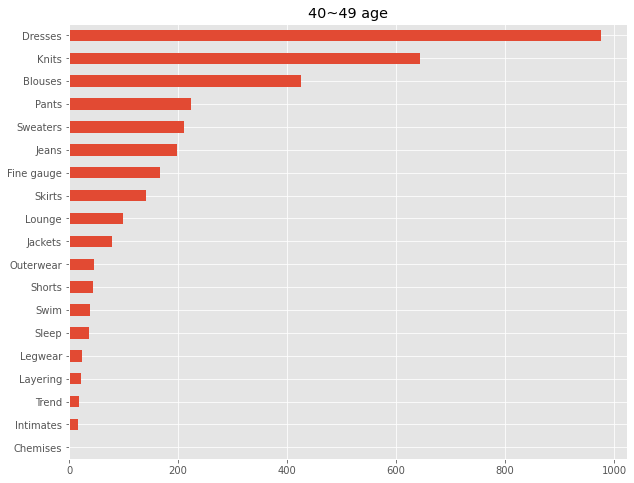

In [26]:
df[df.age_group == '40~49'].class_name.value_counts(ascending=True).plot.barh(figsize=(10,8),title='40~49 age')
plt.show()

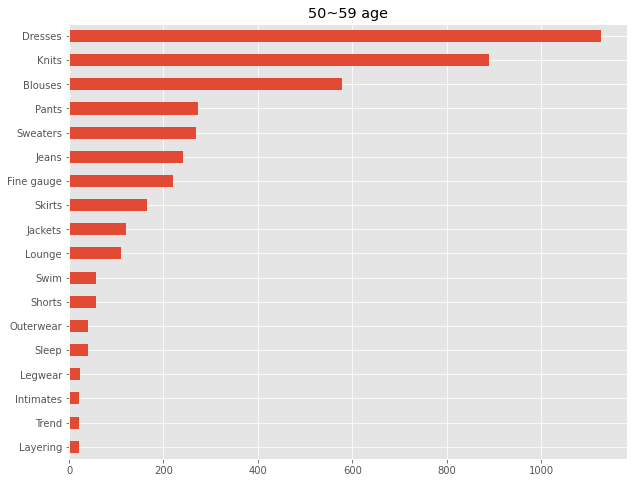

In [27]:
df[df.age_group == '50~59'].class_name.value_counts(ascending=True).plot.barh(figsize=(10,8),title='50~59 age')
plt.show()

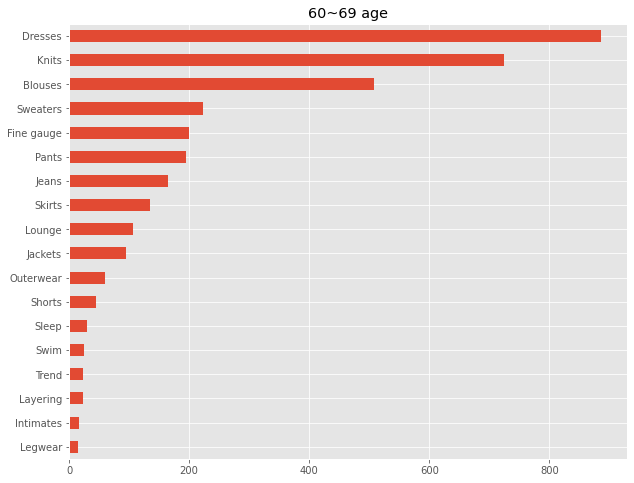

In [28]:
df[df.age_group == '60~69'].class_name.value_counts(ascending=True).plot.barh(figsize=(10,8),title='60~69 age')
plt.show()

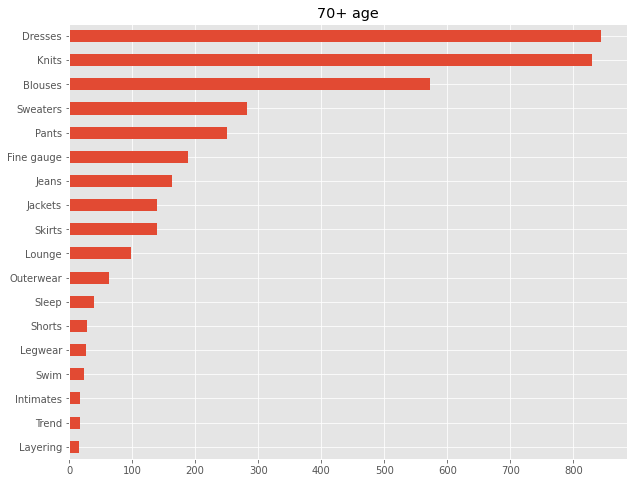

In [29]:
df[df.age_group == '70+'].class_name.value_counts(ascending=True).plot.barh(figsize=(10,8),title='70+ age')
plt.show()

### Age 18 ~ 29

In [30]:
age_18_29 = df[df.age_group == '18~29']

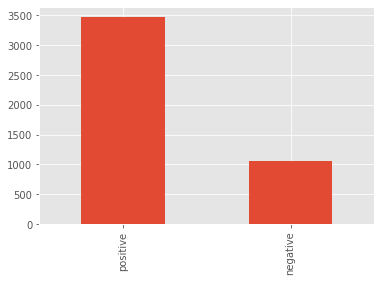

In [31]:
age_18_29.rating_group.value_counts().plot(kind='bar')

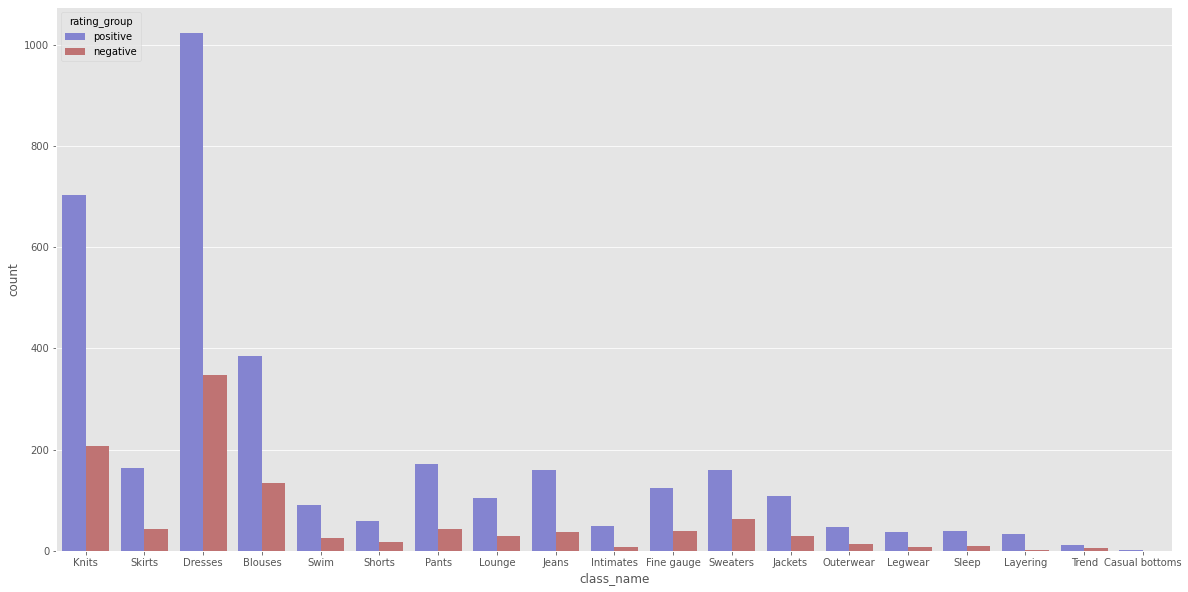

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x='class_name',hue='rating_group',palette=['#7777DD','#CC6666'],data=age_18_29)

### Dresses

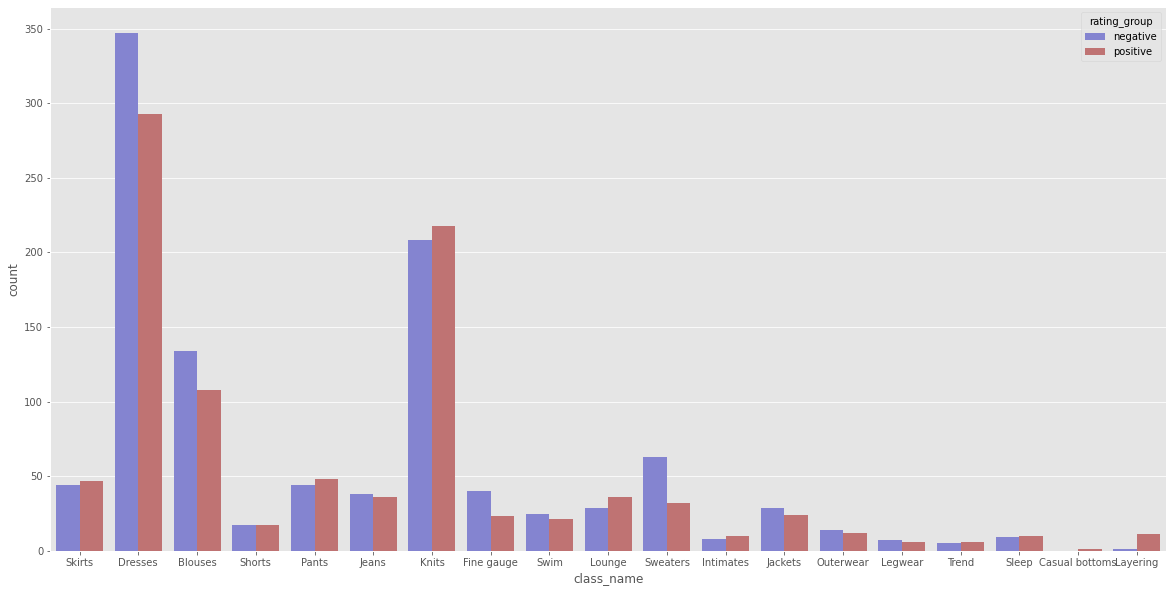

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x='class_name',hue='rating_group',palette=['#7777DD','#CC6666'],data=age_18_29[age_18_29.rating < 5])

### Normalization
### negative score

### Age 30~39

In [34]:
age_30_39 = df[df.age_group == '30~39']

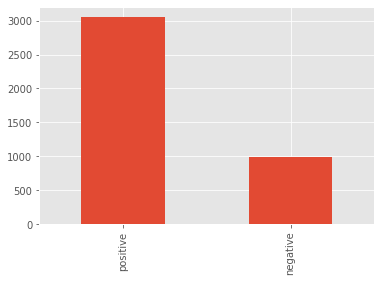

In [35]:
age_30_39.rating_group.value_counts().plot(kind='bar')
plt.show()

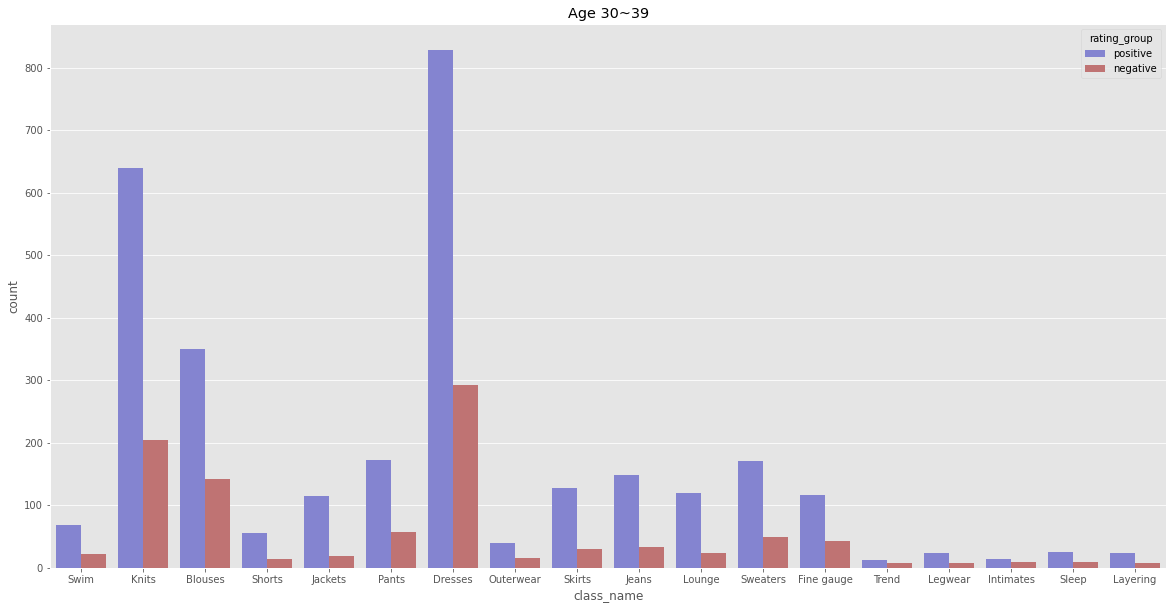

In [36]:
plt.figure(figsize=(20,10))
plt.title('Age 30~39')
sns.countplot(x='class_name',hue='rating_group',palette=['#7777DD','#CC6666'],data=age_30_39)
plt.show()

### Age 40~49

In [37]:
age_40_49 = df[df.age_group == '40~49']

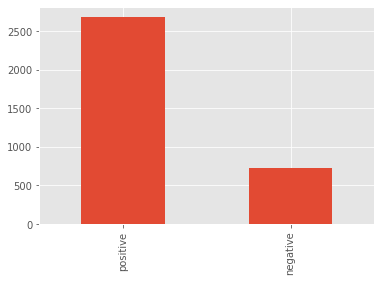

In [38]:
age_40_49.rating_group.value_counts().plot(kind='bar')
plt.show()

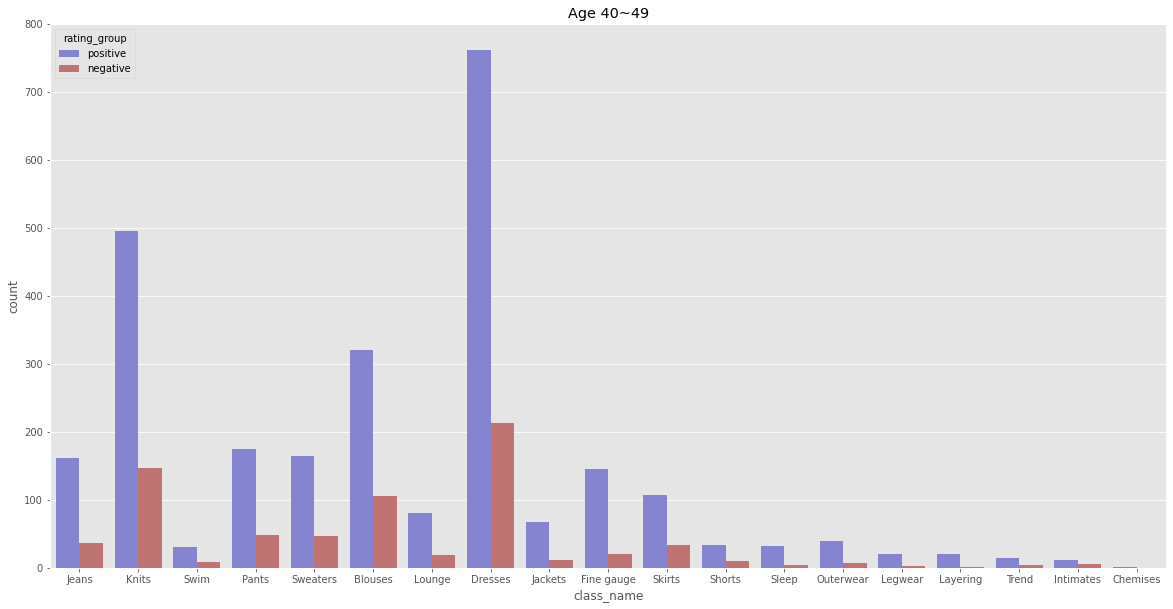

In [39]:
plt.figure(figsize=(20,10))
plt.title('Age 40~49')
sns.countplot(x='class_name',hue='rating_group',palette=['#7777DD','#CC6666'],data=age_40_49)
plt.show()

### Age 50~59

In [40]:
age_50_59 = df[df.age_group == '50~59']

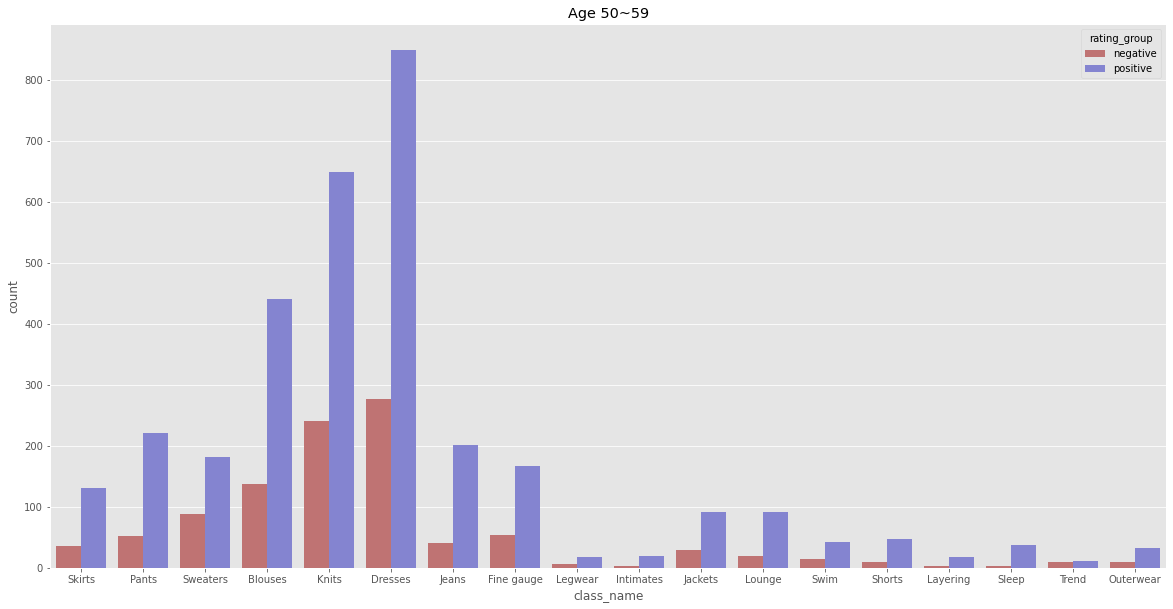

In [41]:
plt.figure(figsize=(20,10))
plt.title('Age 50~59')
sns.countplot(x='class_name',hue='rating_group',data=age_50_59,palette=['#CC6666','#7777DD'])
plt.show()

### Age 60~69

In [42]:
age_60_69 = df[df.age_group == '60~69']

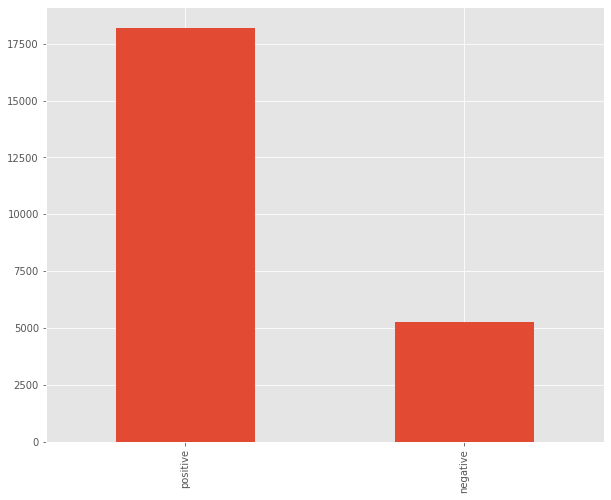

In [43]:
df.rating_group.value_counts().plot(kind='bar',figsize=(10,8))

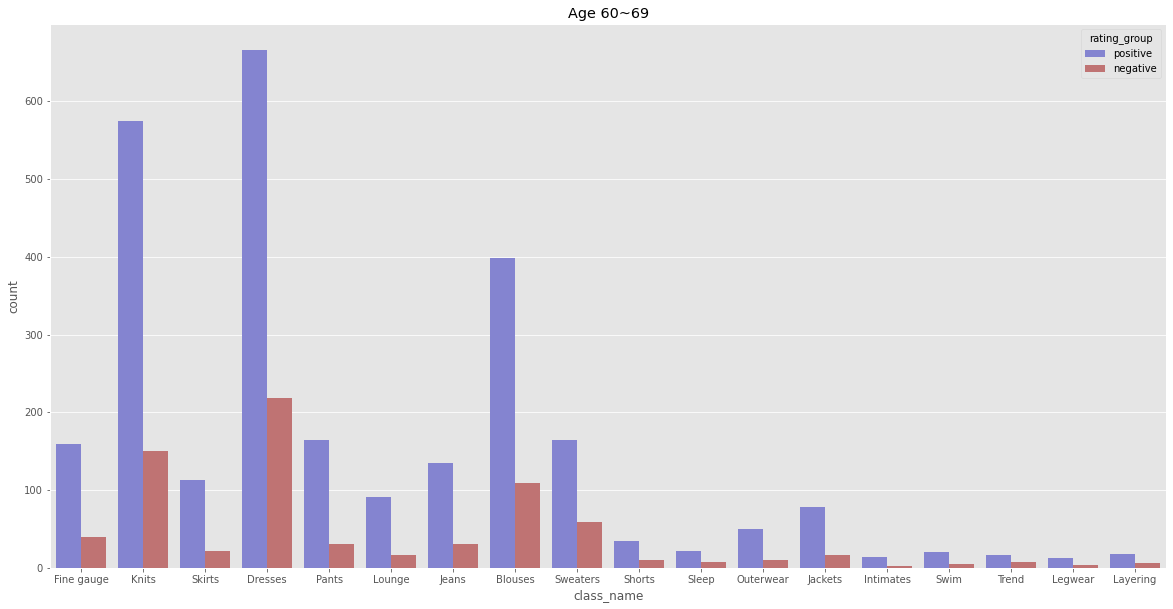

In [44]:
plt.figure(figsize=(20,10))
plt.title('Age 60~69')
sns.countplot(x='class_name',hue='rating_group',data=age_60_69,palette=['#7777DD','#CC6666'])
plt.show()

### Age 70+

In [45]:
age_over_70 = df[df.age_group == '70+']

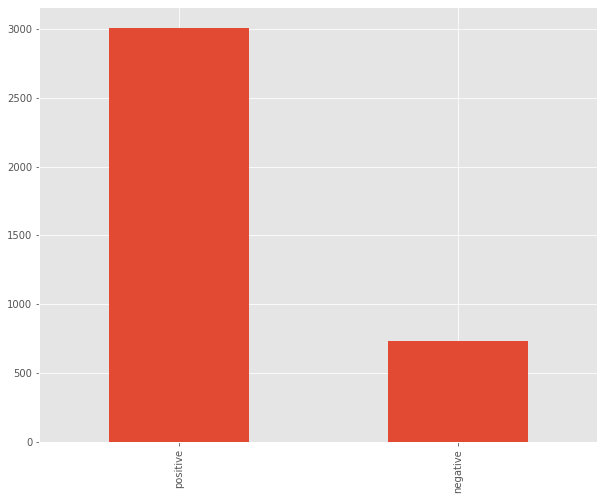

In [46]:
age_over_70.rating_group.value_counts().plot(kind='bar',figsize=(10,8))

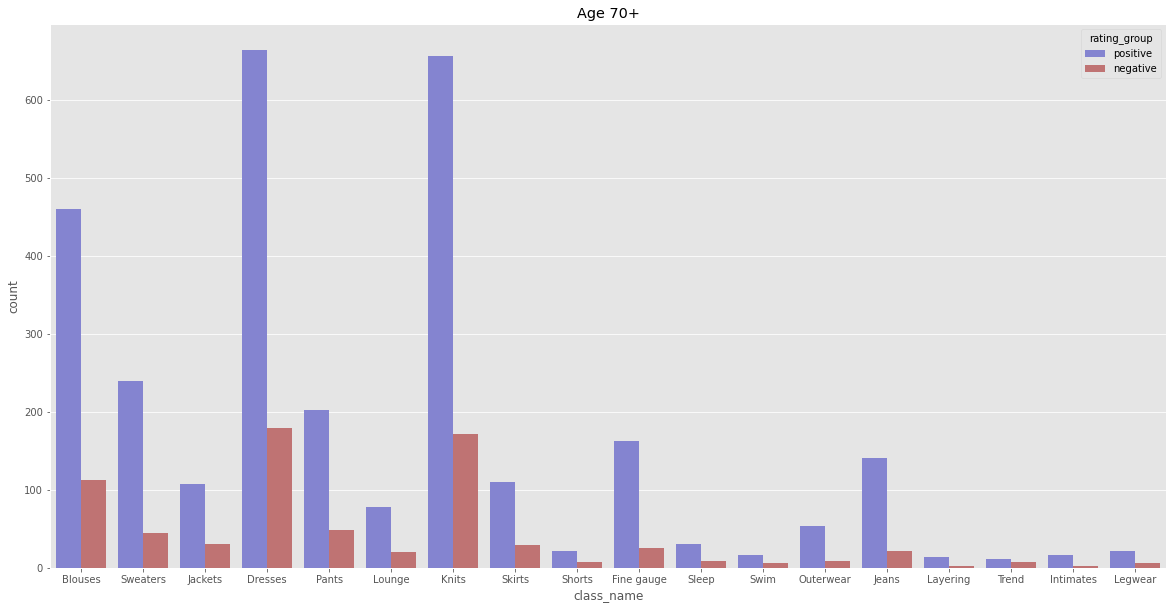

In [47]:
plt.figure(figsize=(20,10))
plt.title('Age 70+')
sns.countplot(x='class_name',hue='rating_group',data=age_over_70,palette=['#7777DD','#CC6666'])
plt.show()

## Most purchase class 

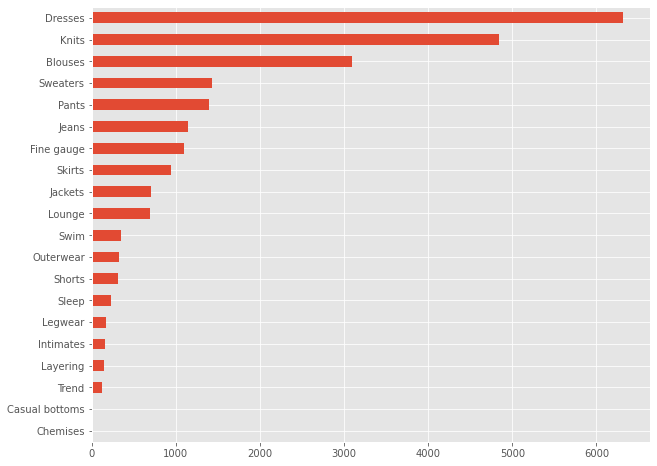

In [48]:
df.class_name.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,8))

### Dress is most purchase clothing

# Top 30 clothing in Dataset

In [49]:
most_popular_product = df.groupby(['department_name','class_name','clothing_id'],as_index=False).size().sort_values('size',ascending=False).rename(columns={'size':'purchase'})

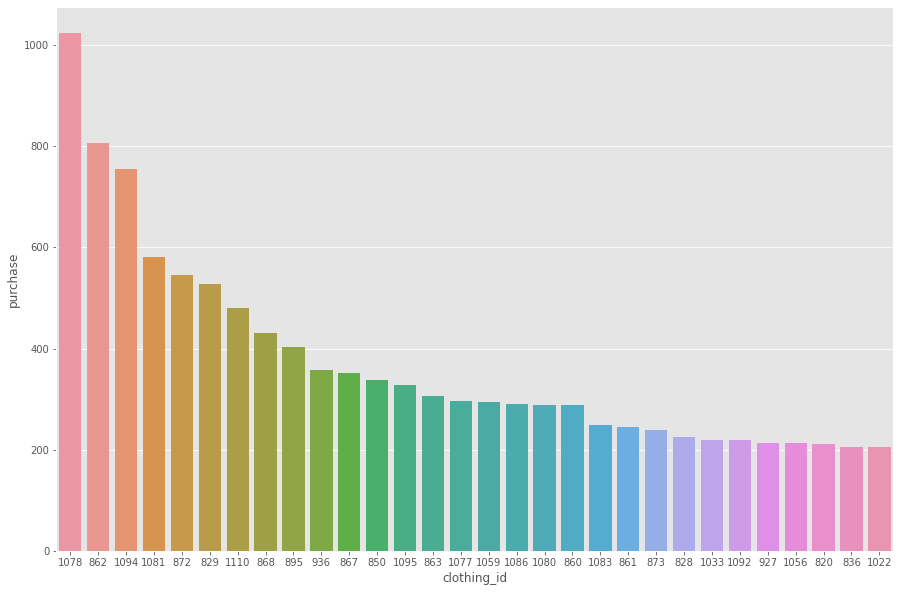

In [50]:
plt.figure(figsize=(15,10))
sns.barplot(x='clothing_id',y='purchase',data=most_popular_product[:30],
            order=most_popular_product[:30].sort_values('purchase',ascending=False).clothing_id)

### 1078 is best clothing and then following 862, 1094 clothing

### Check Recommendation system

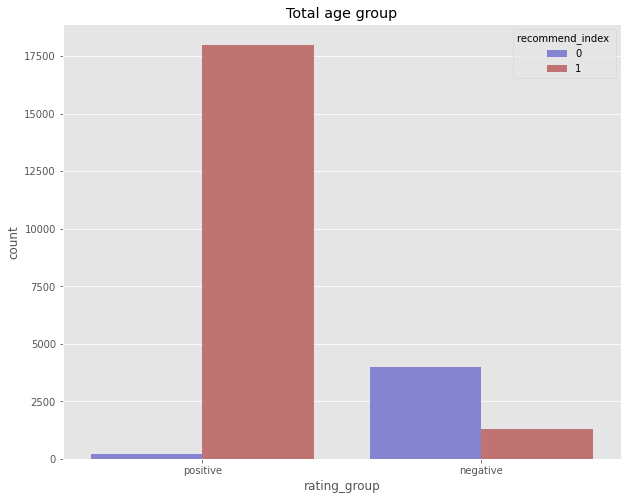

In [51]:
plt.figure(figsize=(10,8))
plt.title('Total age group')
sns.countplot(hue='recommend_index ',x='rating_group',data=df,palette=['#7777DD','#CC6666'])
plt.show()

# Negative & None Recommendation contents word cloud

In [52]:
!pip install Top2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.7 MB/s 
     |████████████████████████████████| 5.2 MB 37.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
     |████████████████████████████████| 1.1 MB 42.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342155 sha256=3a2164d86bedfdd8ae8d93b3a5026f20c17af9e4636a81c662df586d00b43ffe
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7d42cc155efbcc1a2494468799bc129f9ed0be3a9b084ea14480e506f9a2a410
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Creat

In [53]:
from top2vec import Top2Vec

In [54]:
contents = df.review_text.to_list()
model = Top2Vec(documents=contents,workers=-1)
model.get_num_topics()

2022-07-11 05:30:15,025 - top2vec - INFO - Pre-processing documents for training
2022-07-11 05:30:19,751 - top2vec - INFO - Creating joint document/word embedding
2022-07-11 05:30:21,498 - top2vec - INFO - Creating lower dimension embedding of documents
2022-07-11 05:31:35,107 - top2vec - INFO - Finding dense areas of documents
2022-07-11 05:31:39,856 - top2vec - INFO - Finding topics


2

In [56]:
topic_words, word_scores, topic_nums = model.get_topics(2)

In [57]:
topic_words

array([['disagree', 'big', 'rack', 'necklace', 'likely', 'events',
        'hopefully', 'she', 'aren', 'comfy', 'fur', 'love', 'come',
        'dressing', 'fence', 'beading', 'occasions', 'trip', 'anything',
        'huge', 'combination', 'supposed', 'travel', 'skin', 'lay',
        'are', 'issue', 'opened', 'dots', 'gray', 'kimono', 'additional',
        'return', 'arrived', 'scarf', 'broad', 'pulls', 'perfect',
        'asked', 'plain', 'almost', 'surprise', 'spring', 'expected',
        'blazer', 'of', 'ran', 'and', 'grabbed', 'muted'],
       ['baggy', 'scratchy', 'stuck', 'slightly', 'bad', 'daughter',
        'likely', 'long', 'hope', 'butt', 'classic', 'took', 'width',
        'week', 'bohemian', 'arrived', 'frumpy', 'camisole', 'offered',
        'thread', 'stores', 'throughout', 'plus', 'obsessed', 'runs',
        'garment', 'anywhere', 'thigh', 'vintage', 'etc', 'contrast',
        'velvet', 'clingy', 'change', 'burgundy', 'pockets', 'years',
        'skirts', 'thighs', 'call

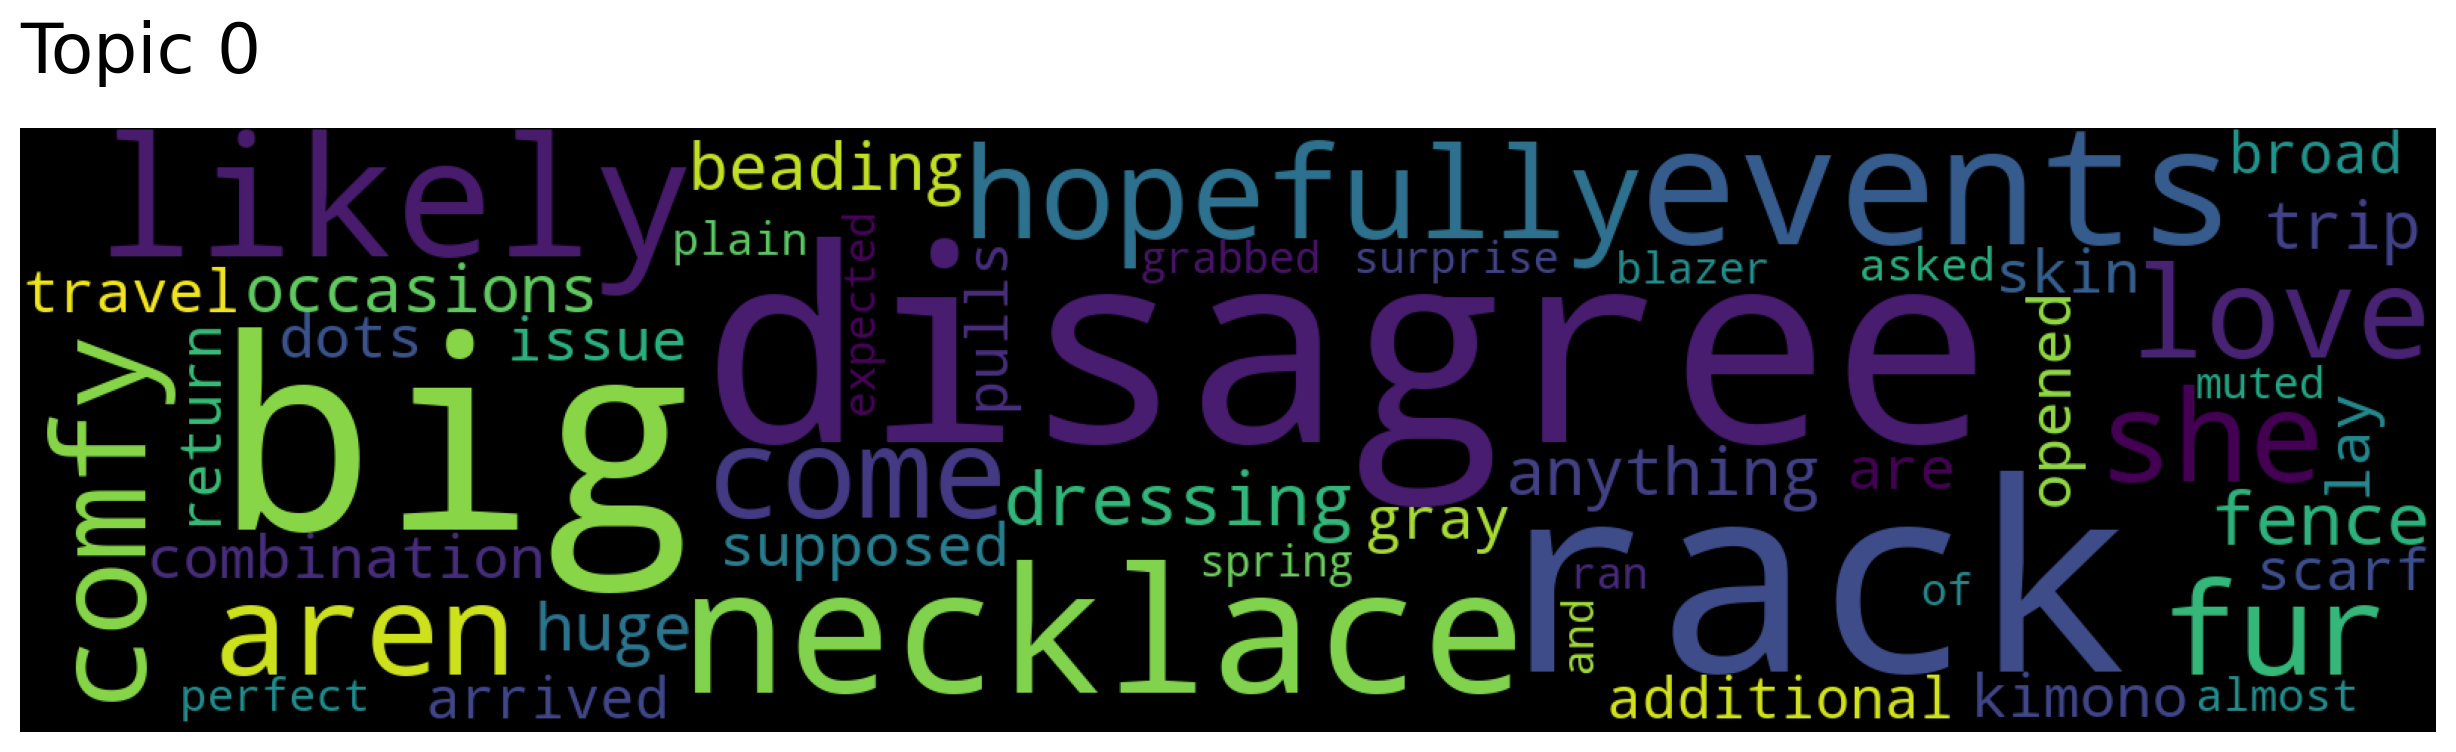

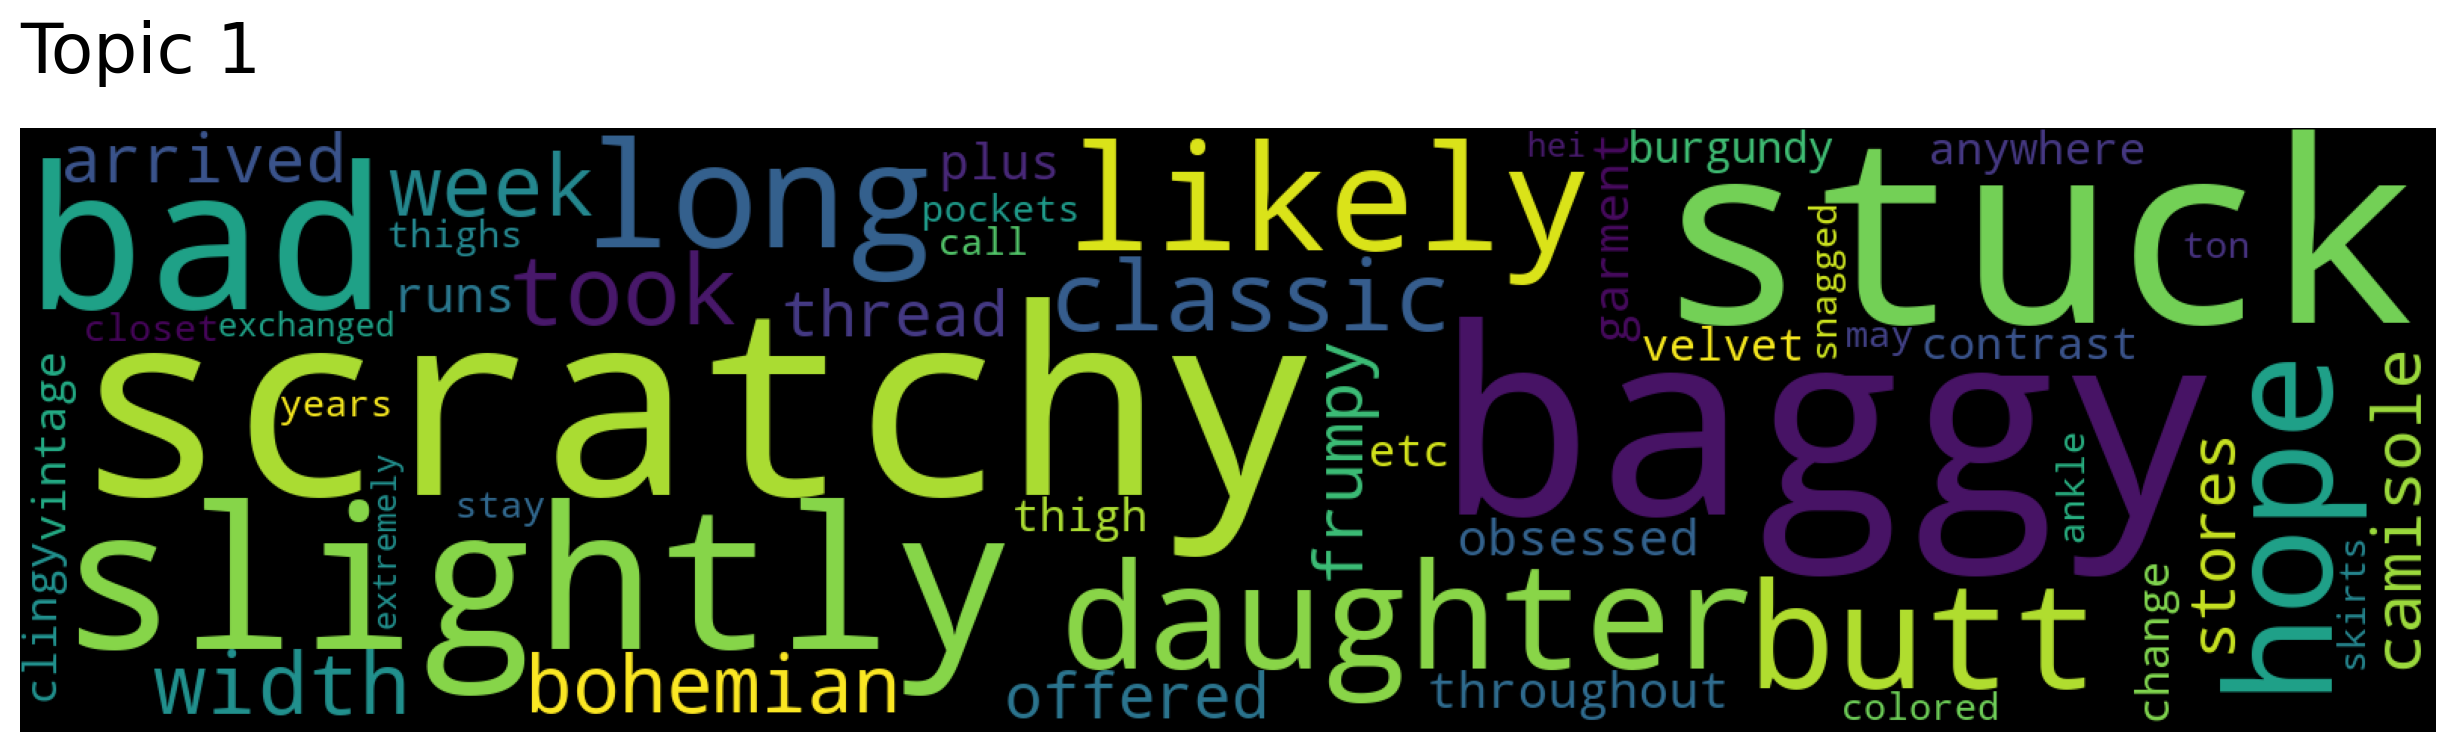

In [58]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)